In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


In [2]:
df = pd.read_csv("challenge.txt", sep="\t", header=None, names =["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"])
df.head()


,a,b,c,d,e,f,g,h,i,j
0,-0.768094,-1.062899,-1.502895,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.326407,-0.725706,-1.436839,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.870501,-0.944614,-0.796163,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.198228,-0.633996,-1.031985,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.581253,-0.839979,-0.762256,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div dir="rtl">

### 1. کاوش اولیه داده ها

</div>

In [3]:
# dimensions of the dataframe
df.shape

(1000, 10)

In [4]:
# count of missing values in each column
df.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
j    0
dtype: int64

<div dir="rtl">

استانداردسازی داده‌ها

برای مقایسه ویژگی‌ها با مقیاس‌های مختلف از `StandardScaler` استفاده می‌شود تا داده‌ها به میانگین صفر و واریانس یک تبدیل شوند.

</div>

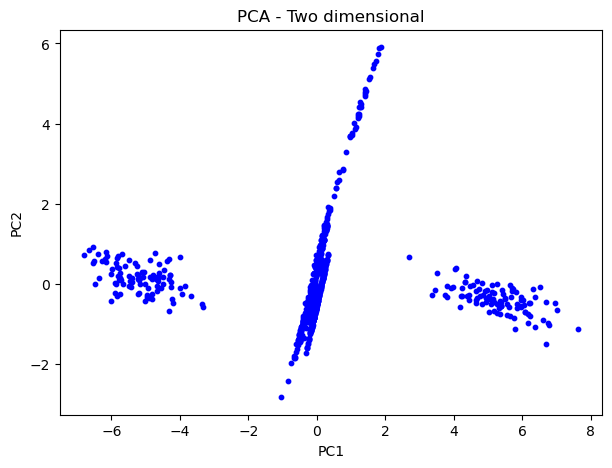

In [5]:

# standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# applying PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# plotting the PCA result
plt.figure(figsize=(7, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=10, c='blue')
plt.title("PCA - Two dimensional")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

<div dir="rtl">

نتایج و الگوهای مشاهده‌شده

**وجود خوشه‌ها (Clusters):**  
در فضای دو بعدی PCA، چندین خوشه‌ی مجزا مشاهده می‌شود که نشان‌دهنده‌ی وجود گروه‌های متمایز در داده است.

**ساختار گروه‌ها (Separated Groups):**  
خوشه‌ها کاملاً از هم جدا هستند و نقاط بین‌خوشه‌ای (انتقالی) کم دیده می‌شود.  
این موضوع احتمالاً نشان‌دهنده‌ی وجود چند کلاس یا چند گروه متفاوت در داده است.

**فاصله‌ی خوشه‌ها (Distances):**  
فاصله‌ی خوشه‌ها نسبتاً زیاد است.  
این فاصله‌ها نشان می‌دهد که داده‌ها از نظر ویژگی‌های اصلی تفاوت قابل توجهی با یکدیگر دارند.

**شکل خوشه‌ها:**  
برخی خوشه‌ها متراکم و گرد هستند (تراکم بالای داده‌ها).  
برخی خوشه‌ها شکل کشیده یا حلقه‌ای دارند که ممکن است نشان‌دهنده‌ی توزیع متفاوت یا ارتباطات خاص بین ویژگی‌ها باشد.

</div>


In [6]:
# descriptive statistics of the dataframe
df.describe()

,a,b,c,d,e,f,g,h,i,j
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,9.600000,16.000000,7.105427e-17,7.105427e-17,5.684342e-17,-8.526513e-17,-2.842171e-17,4.973799e-17,7.105427e-17,3.552714e-17
std,9.072724,15.027236,1.262376e+00,9.979960e-01,4.463174e-01,4.463174e-01,4.463174e-01,4.463174e-01,4.463174e-01,4.463174e-01
min,-1.998575,-2.334028,-2.539774e+00,-4.008339e+00,-1.849478e+00,-1.759452e+00,-1.861308e+00,-1.886905e+00,-2.126307e+00,-1.765256e+00
25%,0.309105,0.360104,-1.006501e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.299342,19.141101,1.612305e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,19.454824,21.241760,9.153497e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,22.692985,42.932004,4.036427e+00,7.424209e+00,1.787044e+00,1.883213e+00,1.836862e+00,1.803226e+00,1.886478e+00,1.823437e+00


In [7]:
# calculating skewness of each column
skewness = df.skew()
skewness

a    0.128254
b    0.352988
c    0.367725
d    2.821982
e    0.018861
f   -0.060630
g    0.071733
h   -0.007445
i    0.000770
j   -0.052196
dtype: float64

In [8]:
# identifying non-normal features based on skewness( |value| > 1)
non_normal_features = skewness[abs(skewness) > 1].index.tolist()
non_normal_features

['d']

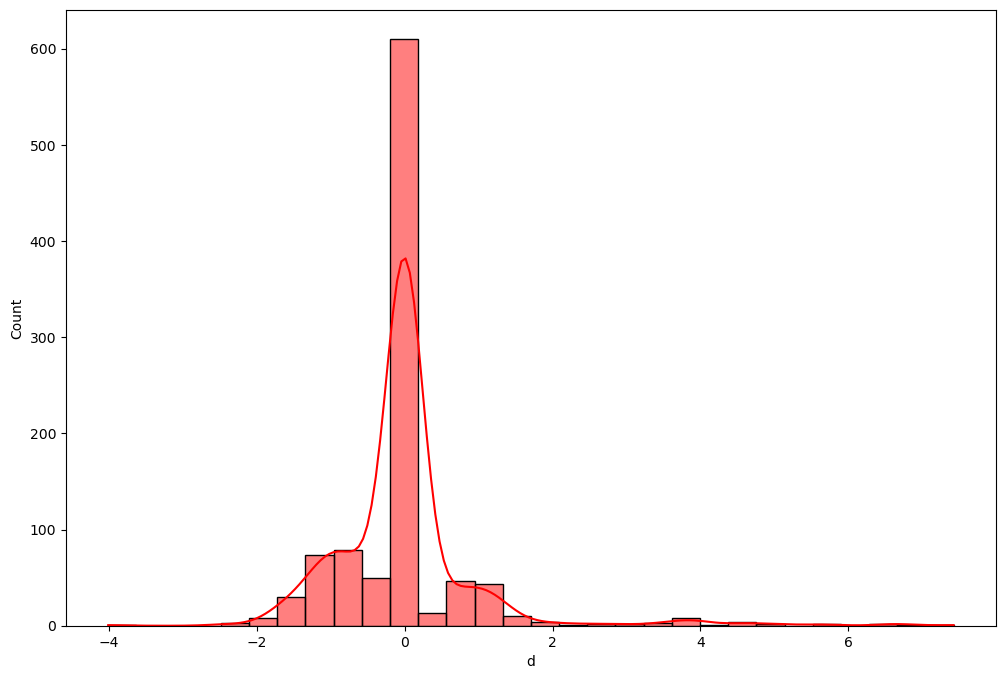

In [9]:
# plotting the distribution of the 'd' column
plt.figure(figsize=(12, 8))
sns.histplot(df['d'], kde=True, bins=30, color="red")
plt.show()

<div dir="rtl">

 ### نتیجه‌گیری
1. **ویژگی‌های با توزیع غیرمعمول:**  
   - ستون `d (3)` → Skewness بالا (2.82) و انحراف معیار نسبتاً زیاد → توزیع غیرنرمال و احتمال وجود مقادیر پرت.

2. **ویژگی‌های با پراکندگی بالا اما نسبتاً نرمال:**  
   - ستون‌های `a (0)` و `b (1)` → انحراف معیار بالا (پراکندگی زیاد) اما Skewness کم → نرمال بودن کلی توزیع حفظ شده است.

3. **بقیه ویژگی‌ها:**  
   - ستون‌های `c (2)` تا `j (9)` → توزیع تقریباً متقارن با Skewness نزدیک صفر و داده‌های Sparse (بیشتر مقادیر صفر).

</div>


In [10]:
# correlation matrix of the dataframe
df.corr

<bound method DataFrame.corr of             a          b         c         d    e    f    g    h    i    j
0   -0.768094  -1.062899 -1.502895  0.000000  0.0  0.0  0.0  0.0  0.0  0.0
1   -1.326407  -0.725706 -1.436839  0.000000  0.0  0.0  0.0  0.0  0.0  0.0
2   -0.870501  -0.944614 -0.796163  0.000000  0.0  0.0  0.0  0.0  0.0  0.0
3   -1.198228  -0.633996 -1.031985  0.000000  0.0  0.0  0.0  0.0  0.0  0.0
4   -0.581253  -0.839979 -0.762256  0.000000  0.0  0.0  0.0  0.0  0.0  0.0
..        ...        ...       ...       ...  ...  ...  ...  ...  ...  ...
995  8.615801  41.448963  3.758721  3.910819  0.0  0.0  0.0  0.0  0.0  0.0
996  8.360474  41.978658  2.164121  1.970064  0.0  0.0  0.0  0.0  0.0  0.0
997  7.575436  41.752979  1.839834  3.986019  0.0  0.0  0.0  0.0  0.0  0.0
998  5.955357  41.034620  3.164139  2.561729  0.0  0.0  0.0  0.0  0.0  0.0
999  6.352264  42.932004  3.416055  0.649748  0.0  0.0  0.0  0.0  0.0  0.0

[1000 rows x 10 columns]>

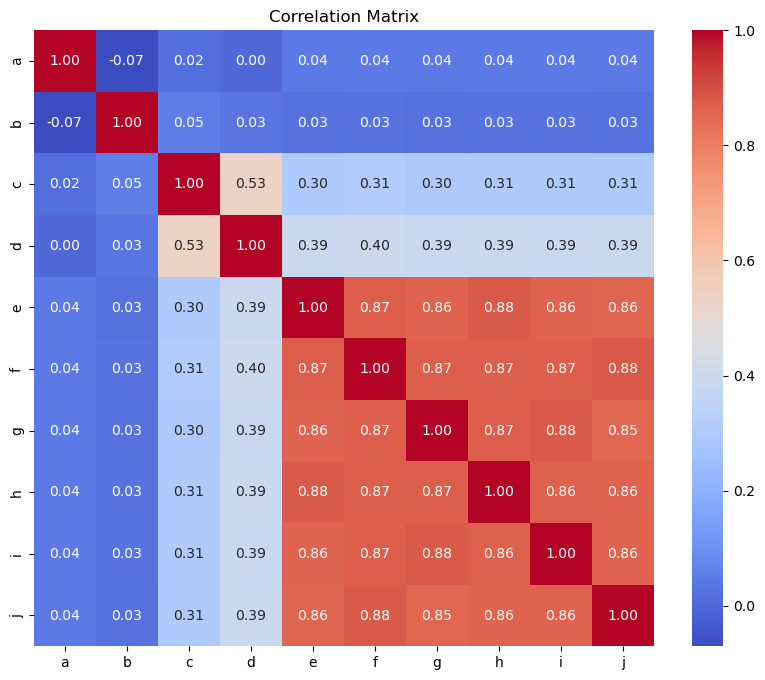

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

<div dir="rtl">

- **قرمز پررنگ (نزدیک به 1)** → همبستگی قوی مثبت  
- **آبی پررنگ (نزدیک به -1)** → همبستگی قوی منفی  
- **نزدیک به 0** → تقریباً بدون ارتباط خطی  



 **1. a و b**
- تقریباً هیچ همبستگی با بقیه متغیرها ندارند (مقادیر نزدیک به 0 یا حتی منفی ضعیف).  
- این یعنی این دو ویژگی نسبتاً مستقل از بقیه هستند.

 **2. c و d**
- همبستگی نسبتاً متوسط با هم دارند (**0.53**) → رابطه خطی ملایمی وجود دارد.  
- با بقیه ویژگی‌ها ارتباط کمی دارند (حدود **0.3**).

 **3. e تا j**
- به شدت با هم همبسته‌اند (**0.85 تا 0.88**) → یعنی این ویژگی‌ها تقریباً اطلاعات مشابهی دارند.  
- احتمال وجود **Multicollinearity** در مدل‌های رگرسیونی یا پیش‌بینی وجود دارد.  
- مثلاً حذف برخی از این ستون‌ها یا استفاده از روش‌هایی مثل **PCA** می‌تونه مفید باشه.

 **4. مقادیر نزدیک به 1 روی قطر اصلی**
- طبیعیه چون هر متغیر با خودش همبستگی کامل داره.

</div>

<div dir="rtl">

---

#### 2. تحلیل خوشه بندی

</div>

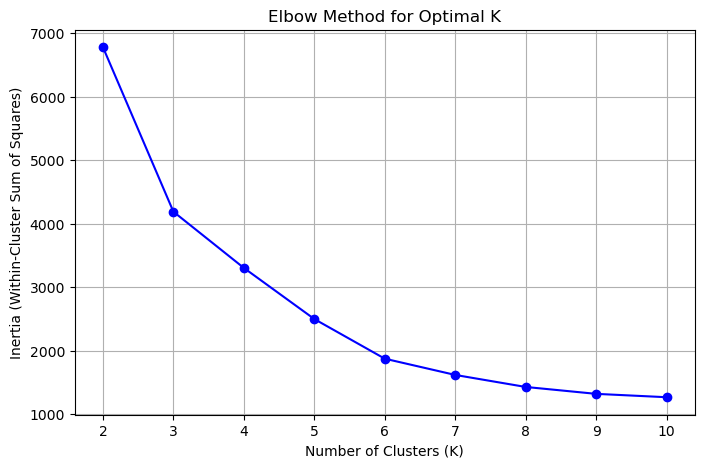


Number of points in each cluster:
cluster
3    400
1    400
0    100
2    100
Name: count, dtype: int64


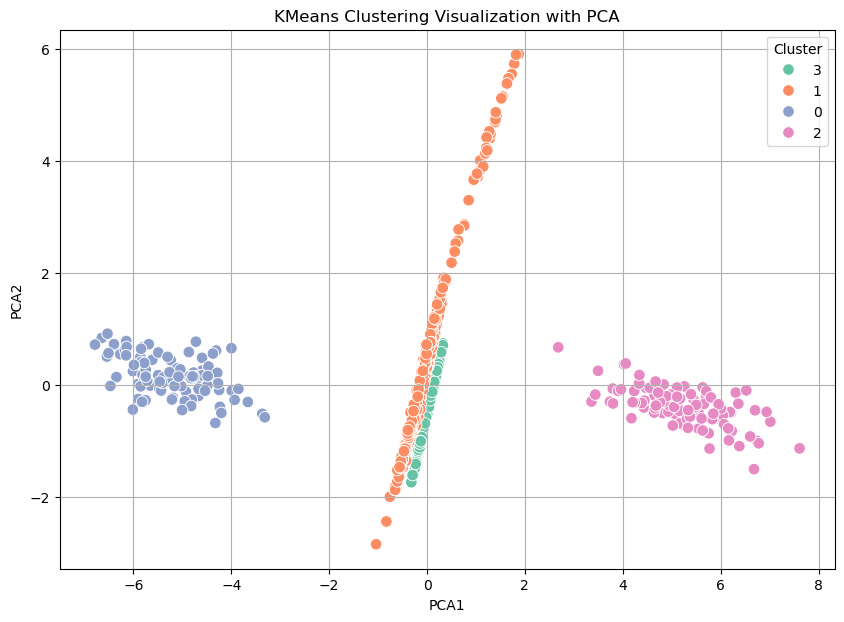

In [12]:

df_kmeans = df.copy()

# standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_kmeans)

# Elbow Method to find optimal K

inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'o-', color='blue')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

# the best K (4)
best_k = 4
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_kmeans['cluster'] = kmeans_final.fit_predict(df_scaled)


print("\nNumber of points in each cluster:")
print(df_kmeans['cluster'].value_counts())

# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df_kmeans['cluster'].astype(str)

# Plot using Seaborn
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=70)
plt.title('KMeans Clustering Visualization with PCA')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


<div dir="rtl">
پیش‌پردازش:

داده‌ها ابتدا نرمال‌سازی شدند، که مرحله‌ای ضروری برای الگوریتم‌هایی مثل KMeans است چون به مقیاس ویژگی‌ها حساس است.

Elbow Method:

نمودار Elbow کمک می‌کند نقطه‌ای را پیدا کنیم که بعد از آن افزایش k دیگر کاهش قابل‌توجهی در Inertia ایجاد نمی‌کند. این نقطه، تعداد خوشه‌های بهینه است.

خوشه‌بندی نهایی:

داده‌ها با مقدار k انتخابی خوشه‌بندی شدند و به هر سطر یک برچسب اختصاص داده شد.

تحلیل خروجی:

تعداد اعضای هر خوشه نشان‌دهنده تعادل (یا عدم تعادل) بین خوشه‌ها است.

موقعیت مراکز خوشه‌ها در فضای نرمال‌شده می‌تواند برای تحلیل ویژگی‌ها مفید باشد (مثلاً با استفاده از PCA برای مصورسازی دو‌بعدی).
</div>

In [13]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# KMeans evaluation
kmeans_labels = df_kmeans['cluster']
print("KMeans Evaluation:")
print(f"Silhouette Score: {silhouette_score(df_scaled, kmeans_labels):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(df_scaled, kmeans_labels):.3f}")


KMeans Evaluation:
Silhouette Score: 0.363
Davies-Bouldin Index: 1.062



Number of clusters found (excluding noise):
3

Number of points in each cluster:
cluster
 0    595
 1    200
-1    190
 2     15
Name: count, dtype: int64


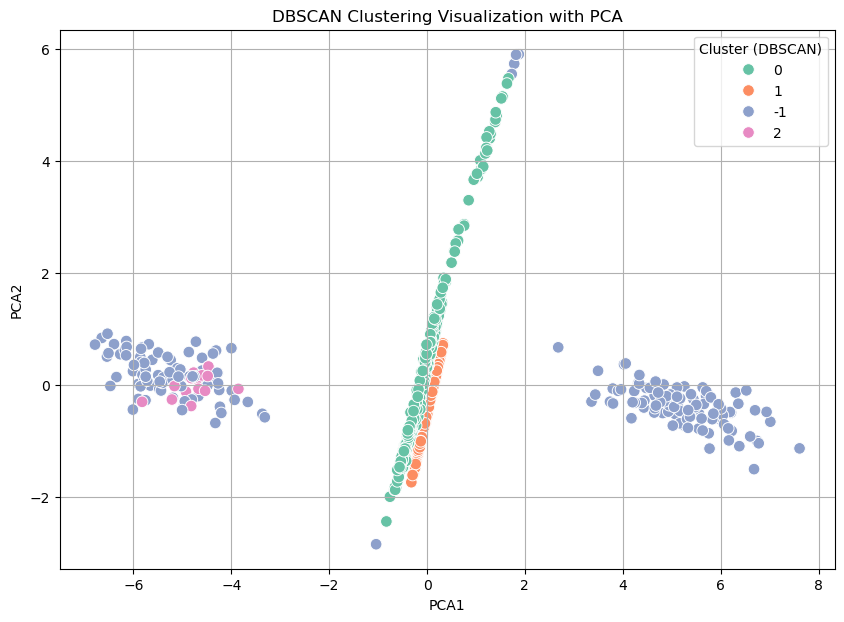

In [14]:

df_dbscan = df.copy()

# standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dbscan)

# apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=15)
dbscan_labels = dbscan.fit_predict(df_scaled)

df_dbscan['cluster'] = dbscan_labels

# analyze results
print("\nNumber of clusters found (excluding noise):")
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(n_clusters)

print("\nNumber of points in each cluster:")
print(df_dbscan['cluster'].value_counts())

# visualize using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df_dbscan['cluster'].astype(str)

# plot clusters (noise is shown as cluster '-1')
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=70)
plt.title('DBSCAN Clustering Visualization with PCA')
plt.legend(title='Cluster (DBSCAN)')
plt.grid(True)
plt.show()


<div dir="rtl">


الگوریتم **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** یک روش خوشه‌بندی بر پایه تراکم نقاط است. برخلاف الگوریتم‌هایی مانند K-Means که نیاز به مشخص‌کردن تعداد خوشه‌ها به صورت دستی دارند، DBSCAN به صورت **خودکار** خوشه‌ها را بر اساس تراکم داده‌ها پیدا می‌کند.

پارامترهای اصلی DBSCAN

- **`eps` (اپسیلون):** حداکثر فاصله‌ای که دو نقطه می‌توانند از یکدیگر داشته باشند تا همسایه محسوب شوند.
- **`min_samples`:** حداقل تعداد نقاط لازم در یک منطقه برای اینکه آن منطقه به عنوان یک خوشه متراکم شناخته شود.
- **خروجی:** لیبل هر داده (شماره خوشه) یا `-1` برای نقاط نویز (outliers).



1. **استانداردسازی داده‌ها:**
   داده‌ها ابتدا با استفاده از `StandardScaler` نرمال شدند تا ویژگی‌ها مقیاس مشابهی داشته باشند (میانگین صفر و انحراف معیار یک).

2. **اجرای الگوریتم DBSCAN:**
   الگوریتم DBSCAN با مقادیر `eps = 1.5` و `min_samples = 15` اجرا شد. این پارامترها به الگوریتم امکان دادند تا نواحی پرتراکم را به‌عنوان خوشه شناسایی کند.

3. **برچسب‌گذاری خوشه‌ها:**
   خروجی DBSCAN به هر سطر از داده یک برچسب خوشه اختصاص داد. در اینجا:
   - `0, 1, 2, ...` شماره خوشه‌ها هستند.
   - `-1` نشان‌دهنده **نویز** است؛ داده‌هایی که در هیچ خوشه‌ای قرار نگرفته‌اند.

4. **تحلیل تعداد نقاط در خوشه‌ها:**
   با استفاده از `value_counts()` تعداد نقاط در هر خوشه (و همچنین تعداد نویزها) نمایش داده شد.

5. **کاهش ابعاد با PCA:**
   از الگوریتم **PCA** برای کاهش ابعاد داده‌ها از ۱۰ بعد به ۲ بعد استفاده شد تا بتوان نموداری از خوشه‌ها ترسیم کرد.

6. **بصری‌سازی نهایی:**
   با استفاده از کتابخانه Seaborn، نموداری رسم شد که در آن هر نقطه بر اساس خوشه‌ای که در آن قرار گرفته رنگ‌بندی شده بود. نقاط نویز با رنگ جداگانه نمایش داده می‌شوند.


### تفسیر خروجی:

- **خوشه‌های مشخص و جدا از هم:** اگر در نمودار، گروه‌هایی از نقاط با رنگ مشخص و بدون هم‌پوشانی دیده شوند، DBSCAN توانسته خوشه‌ها را به خوبی از هم جدا کند.
- **وجود نقاط نویز:** نقاط با لیبل `-1` در واقع داده‌هایی هستند که تراکم کافی برای تعلق به هیچ خوشه‌ای ندارند. این ویژگی باعث می‌شود DBSCAN برای تشخیص نقاط پرت بسیار مؤثر باشد.
- **برتری نسبت به K-Means:** برخلاف KMeans، نیازی به مشخص کردن تعداد خوشه‌ها از قبل نیست. همچنین DBSCAN می‌تواند خوشه‌هایی با اشکال پیچیده‌تر از دایره یا بیضی تشخیص دهد.



</div>

In [15]:
# DBSCAN may assign -1 to noise, which we must handle
dbscan_labels = df_dbscan['cluster']

# Remove noise (-1) before computing silhouette score
mask = dbscan_labels != -1
filtered_data = df_scaled[mask]
filtered_labels = dbscan_labels[mask]

print("DBSCAN Evaluation (excluding noise):")
print(f"Silhouette Score: {silhouette_score(filtered_data, filtered_labels):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(filtered_data, filtered_labels):.3f}")


DBSCAN Evaluation (excluding noise):
Silhouette Score: 0.361
Davies-Bouldin Index: 0.835


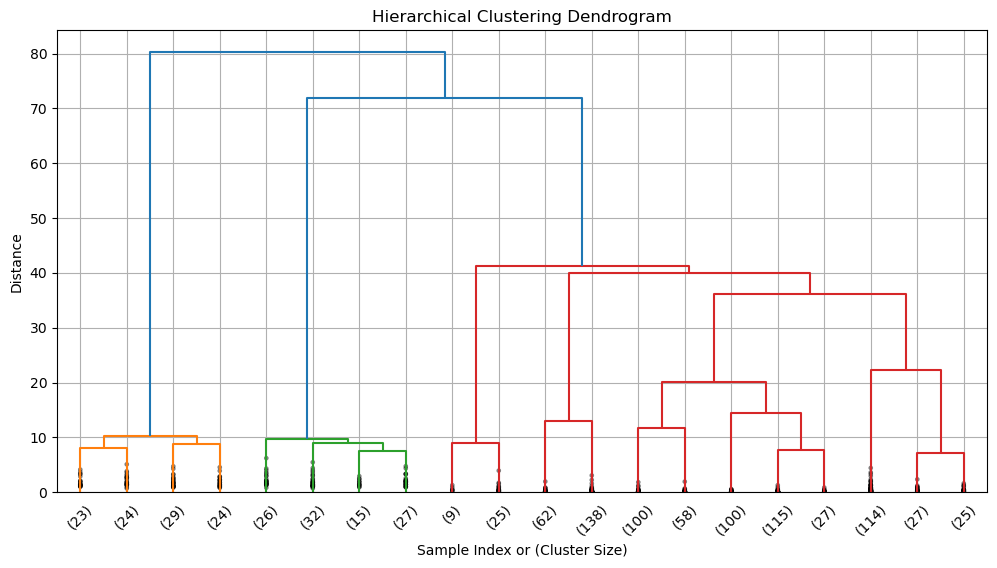

Number of points in each cluster:
cluster
5    566
4    200
2    100
1    100
3     34
Name: count, dtype: int64


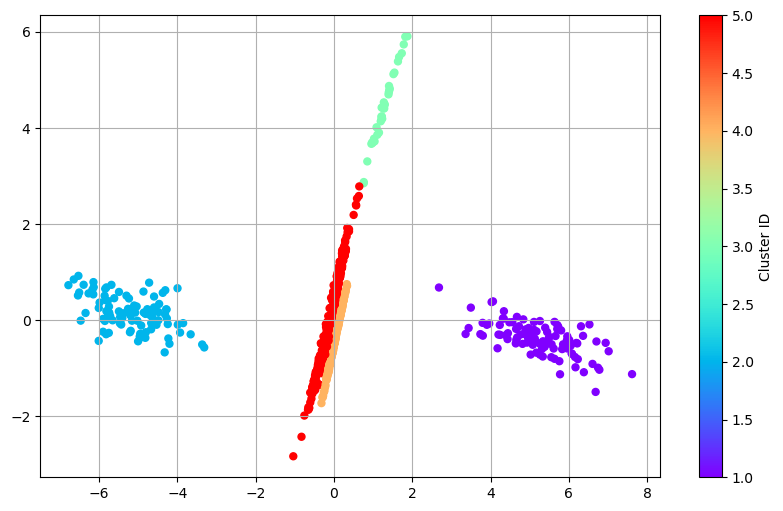

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

df_hierarchical = df.copy()

# standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_hierarchical)

# perform hierarchical clustering using Ward linkage
Z = linkage(df_scaled, method='ward')

# plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=45,
           leaf_font_size=10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

# cut dendrogram to form flat clusters (5 clusters)
n_clusters = 5
clusters = fcluster(Z, t=n_clusters, criterion='maxclust')
df_hierarchical['cluster'] = clusters

# show cluster sizes
print("Number of points in each cluster:")
print(df_hierarchical['cluster'].value_counts())

# PCA projection to visualize clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', s=25)
plt.colorbar(label='Cluster ID')
plt.grid(True)
plt.show()


<div dir="rtl">

Hierarchical Clustering

خوشه‌بندی سلسله‌مراتبی یا **Hierarchical Clustering** یکی از روش‌های خوشه‌بندی بدون نیاز به تعیین تعداد خوشه‌ها در ابتدا است. این روش به صورت گام‌به‌گام خوشه‌ها را به هم **ادغام** یا **تقسیم** می‌کند و ساختاری شبیه به درخت (دندروگرام) ایجاد می‌کند.

در اینجا از روش **Ward** استفاده شده که هدف آن **کمینه کردن مجموع مربعات فاصله‌ها درون خوشه‌ها** است (مشابه KMeans اما بدون نیاز به تعداد خوشه از ابتدا).


1. **اجرای linkage با روش ward:**
   داده‌های نرمال‌شده با روش Ward خوشه‌بندی شدند و یک ماتریس اتصال (`Z`) تولید شد.

2. **رسم دندروگرام (dendrogram):**
   با استفاده از `dendrogram()` ساختار درختی خوشه‌بندی نمایش داده شد.
   - پارامتر `truncate_mode='lastp'` برای خلاصه‌سازی نمایش استفاده شد.
   - محور عمودی نشان‌دهنده‌ی فاصله یا اختلاف بین خوشه‌هاست.
   - با نگاه به نقطه‌ای که بیشترین افزایش ناگهانی در ارتفاع اتفاق افتاده، می‌توان حدس زد که چند خوشه مناسب است.

3. **تعیین تعداد خوشه‌ها با fcluster:**
   با تابع `fcluster()`، درخت به صورت صاف برش خورده تا به تعداد مشخصی (در اینجا ۵) خوشه برسیم.

4. **بررسی تعداد اعضای هر خوشه:**
   با `value_counts()` تعداد نقاط در هر خوشه شمارش شد.

5. **کاهش ابعاد و مصورسازی با PCA:**
   داده‌ها با استفاده از **PCA** به ۲ بعد کاهش داده شدند و سپس با رنگ‌های مختلف در نمودار رسم شدند.
   - هر رنگ نمایان‌گر یک خوشه است.
   - اگر خوشه‌ها به خوبی جدا شده باشند، نشان‌دهنده‌ی عملکرد خوب الگوریتم است.

---

- خوشه‌بندی سلسله‌مراتبی با روش Ward به خوبی داده‌ها را ساختاربندی کرد.
- با تعیین تعداد خوشه‌ها (مثلاً ۵ عدد) و اعمال آن با `fcluster`، خوشه‌ها مشخص شدند.
- دندروگرام به عنوان ابزار تصویری بسیار مفیدی برای تشخیص **تعداد مناسب خوشه‌ها** و **بررسی ساختار خوشه‌ها** است.
- کاهش ابعاد با PCA کمک کرد تا خوشه‌ها را به صورت دوبعدی ببینیم و بررسی بصری داشته باشیم.
- این روش به خصوص در داده‌هایی که **ساختار درختی** یا **سلسله‌مراتبی** دارند، بسیار کاربردی و دقیق است.

In [17]:
# chierarchical clustering evalution
hierarchical_labels = df_hierarchical['cluster']

print("Hierarchical Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_score(df_scaled, hierarchical_labels):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(df_scaled, hierarchical_labels):.3f}")


Hierarchical Clustering Evaluation:
Silhouette Score: 0.428
Davies-Bouldin Index: 0.722


<div dir="rtl">
ما سه الگوریتم مختلف خوشه‌بندی را بر روی داده‌ها اجرا کردیم و با استفاده از دو معیار **داخلی**، یعنی **امتیاز سیلوئت (Silhouette Score)** و **شاخص دیویس-بولدین (Davies-Bouldin Index)** عملکرد آن‌ها را ارزیابی کردیم:

| الگوریتم              | امتیاز سیلوئت ↑ | شاخص دیویس-بولدین ↓ |
|------------------------|------------------|------------------------|
| **Hierarchical**       | **0.428**        | **0.722**              |
| **DBSCAN**             | 0.361            | 0.835                  |
| **KMeans**             | 0.363            | 1.062                  |

---

### تفسیر نتایج:
 **خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)**  
- بهترین امتیاز سیلوئت (**0.428**) و کمترین مقدار شاخص دیویس-بولدین (**0.722**) را به دست آورده است.
- این نشان‌دهنده‌ی خوشه‌بندی با انسجام داخلی خوب و جدایی مناسب بین خوشه‌ها است.
- مزیت مهم آن نیاز نداشتن به تعیین تعداد خوشه‌ها از قبل و عملکرد خوب روی ساختارهای مختلف داده است.

####  **DBSCAN** (با حذف نقاط نویز)  
- عملکرد آن نزدیک به خوشه‌بندی سلسله‌مراتبی است.
- امتیاز سیلوئت کمی پایین‌تر (**0.361**) و شاخص دیویس-بولدین کمی بالاتر (**0.835**) است.
- توانایی شناسایی خوشه‌های با شکل‌های نامنظم و نقاط پرت را دارد، ولی وابسته به انتخاب مناسب پارامترها (مانند `eps` و `min_samples`) است.

####  **KMeans**  
- ضعیف‌ترین عملکرد را بین سه الگوریتم داشته است.
- امتیاز سیلوئت آن پایین (**0.363**) و شاخص دیویس-بولدین بالاترین مقدار (**1.062**) را دارد.
- احتمالاً به دلیل شکل غیرفشرده یا اندازه‌های نابرابر خوشه‌ها در داده‌ها است که KMeans برای آن‌ها مناسب نیست.

---

###  **نتیجه‌گیری نهایی:**

- الگوریتم **Hierarchical Clustering** بهترین گزینه برای این مجموعه داده بوده است.
- **DBSCAN** هم عملکرد قابل قبولی دارد، به‌ویژه در مواجهه با نویز و خوشه‌های پیچیده.
- **KMeans** در این داده‌ها نتیجه مطلوبی نداشته و ممکن است به پیش‌پردازش بیشتر یا تنظیم بهتر نیاز داشته باشد.


</div>


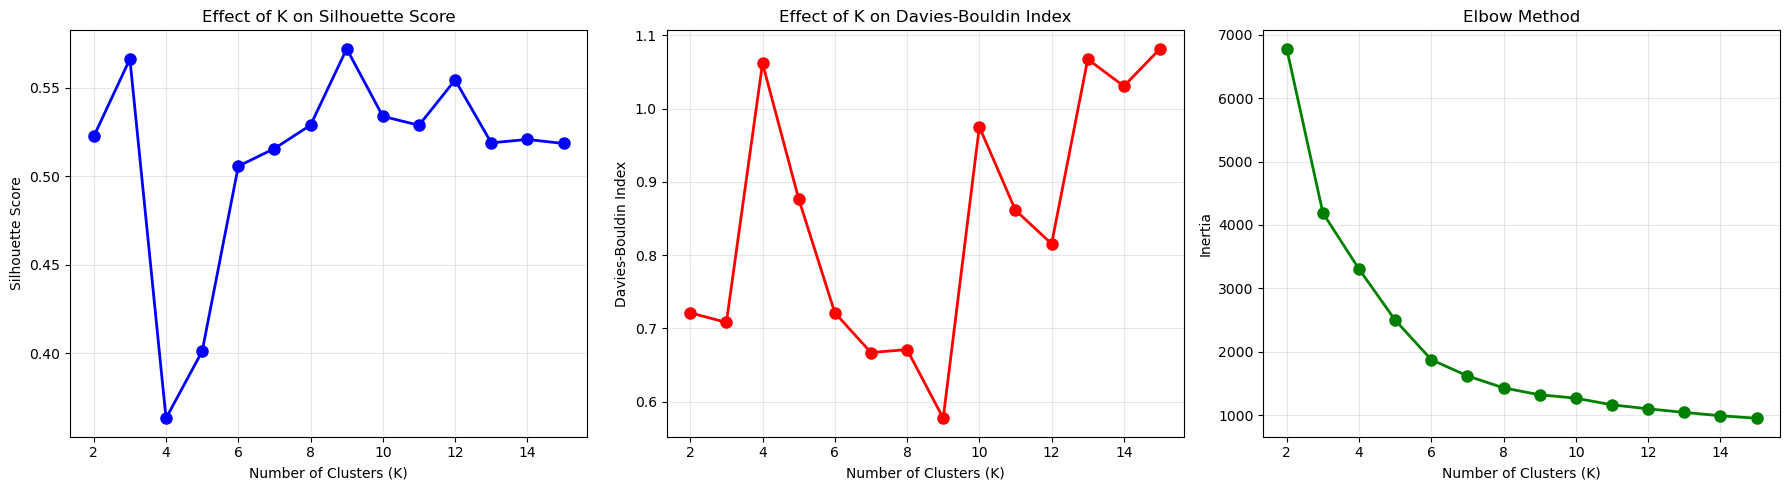

Best K based on Silhouette Score: 9
Best K based on Davies-Bouldin Index: 9

Detailed K-Means Results:
     k  silhouette  davies_bouldin   inertia
0    2       0.523           0.721  6780.570
1    3       0.566           0.708  4189.426
2    4       0.363           1.062  3303.968
3    5       0.401           0.877  2498.903
4    6       0.506           0.721  1874.346
5    7       0.516           0.667  1618.340
6    8       0.529           0.671  1429.078
7    9       0.572           0.577  1320.339
8   10       0.534           0.975  1267.326
9   11       0.529           0.861  1162.017
10  12       0.554           0.815  1098.654
11  13       0.519           1.067  1042.128
12  14       0.521           1.031   989.770
13  15       0.519           1.082   950.052


In [18]:
# K-Means Sensitivity Analysis

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

k_values = range(2, 16)
kmeans_results = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    
    # calculate metrics
    silhouette = silhouette_score(df_scaled, labels)
    davies_bouldin = davies_bouldin_score(df_scaled, labels)
    inertia = kmeans.inertia_
    
    kmeans_results.append({
        'k': k,
        'silhouette': silhouette,
        'davies_bouldin': davies_bouldin,
        'inertia': inertia
    })

# convert to DataFrame
kmeans_df = pd.DataFrame(kmeans_results)

# plot results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# silhouette Score
axes[0].plot(kmeans_df['k'], kmeans_df['silhouette'], 'o-', color='blue', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Effect of K on Silhouette Score')
axes[0].grid(True, alpha=0.3)

# davies-Bouldin Index
axes[1].plot(kmeans_df['k'], kmeans_df['davies_bouldin'], 'o-', color='red', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Davies-Bouldin Index')
axes[1].set_title('Effect of K on Davies-Bouldin Index')
axes[1].grid(True, alpha=0.3)

# inertia (Elbow Method)
axes[2].plot(kmeans_df['k'], kmeans_df['inertia'], 'o-', color='green', linewidth=2, markersize=8)
axes[2].set_xlabel('Number of Clusters (K)')
axes[2].set_ylabel('Inertia')
axes[2].set_title('Elbow Method')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# find optimal K based on different criteria
optimal_silhouette_k = kmeans_df.loc[kmeans_df['silhouette'].idxmax(), 'k']
optimal_davies_k = kmeans_df.loc[kmeans_df['davies_bouldin'].idxmin(), 'k']

print(f"Best K based on Silhouette Score: {optimal_silhouette_k}")
print(f"Best K based on Davies-Bouldin Index: {optimal_davies_k}")
print("\nDetailed K-Means Results:")
print(kmeans_df.round(3))


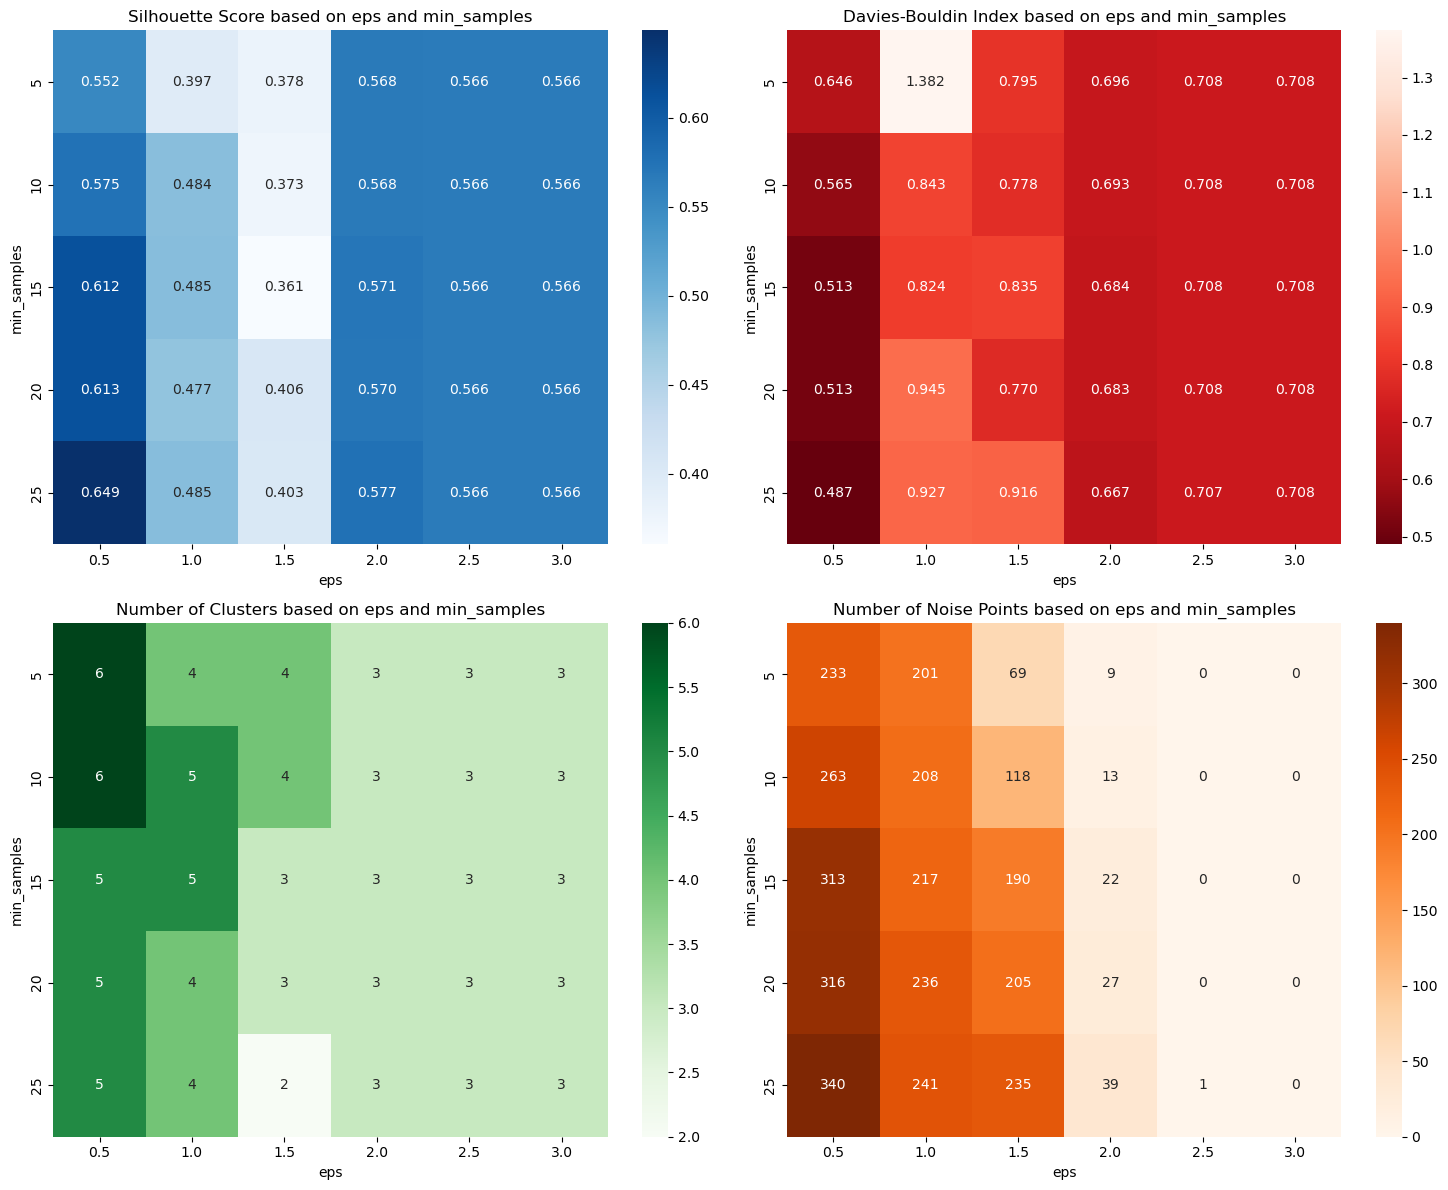

Best DBSCAN parameters:
Based on silhouette score: eps=0.5, min_samples=25
Based on Davies-Bouldin index: eps=0.5, min_samples=25


In [19]:
# DBSCAN Sensitivity Analysis

eps_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
min_samples_values = [5, 10, 15, 20, 25]

dbscan_results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled)
        
        # count clusters (excluding noise)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        # Calculate metrics (excluding noise)
        mask = labels != -1
        if sum(mask) > 1 and n_clusters > 1:
            filtered_data = df_scaled[mask]
            filtered_labels = labels[mask]
            silhouette = silhouette_score(filtered_data, filtered_labels)
            davies_bouldin = davies_bouldin_score(filtered_data, filtered_labels)
        else:
            silhouette = np.nan
            davies_bouldin = np.nan
        
        dbscan_results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette': silhouette,
            'davies_bouldin': davies_bouldin
        })

# convert to DataFrame
dbscan_df = pd.DataFrame(dbscan_results)

# create heatmaps
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# silhouette Score Heatmap
silhouette_pivot = dbscan_df.pivot(index='min_samples', columns='eps', values='silhouette')
sns.heatmap(silhouette_pivot, annot=True, fmt='.3f', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('Silhouette Score based on eps and min_samples')
axes[0,0].set_xlabel('eps')
axes[0,0].set_ylabel('min_samples')

# davies-Bouldin Index Heatmap
davies_pivot = dbscan_df.pivot(index='min_samples', columns='eps', values='davies_bouldin')
sns.heatmap(davies_pivot, annot=True, fmt='.3f', cmap='Reds_r', ax=axes[0,1])
axes[0,1].set_title('Davies-Bouldin Index based on eps and min_samples')
axes[0,1].set_xlabel('eps')
axes[0,1].set_ylabel('min_samples')

# number of Clusters Heatmap
clusters_pivot = dbscan_df.pivot(index='min_samples', columns='eps', values='n_clusters')
sns.heatmap(clusters_pivot, annot=True, fmt='d', cmap='Greens', ax=axes[1,0])
axes[1,0].set_title('Number of Clusters based on eps and min_samples')
axes[1,0].set_xlabel('eps')
axes[1,0].set_ylabel('min_samples')

# number of Noise Points Heatmap
noise_pivot = dbscan_df.pivot(index='min_samples', columns='eps', values='n_noise')
sns.heatmap(noise_pivot, annot=True, fmt='d', cmap='Oranges', ax=axes[1,1])
axes[1,1].set_title('Number of Noise Points based on eps and min_samples')
axes[1,1].set_xlabel('eps')
axes[1,1].set_ylabel('min_samples')

plt.tight_layout()
plt.show()

# find optimal parameters
best_silhouette_idx = dbscan_df['silhouette'].idxmax()
best_davies_idx = dbscan_df['davies_bouldin'].idxmin()

print("Best DBSCAN parameters:")
print(f"Based on silhouette score: eps={dbscan_df.loc[best_silhouette_idx, 'eps']}, min_samples={dbscan_df.loc[best_silhouette_idx, 'min_samples']}")
print(f"Based on Davies-Bouldin index: eps={dbscan_df.loc[best_davies_idx, 'eps']}, min_samples={dbscan_df.loc[best_davies_idx, 'min_samples']}")

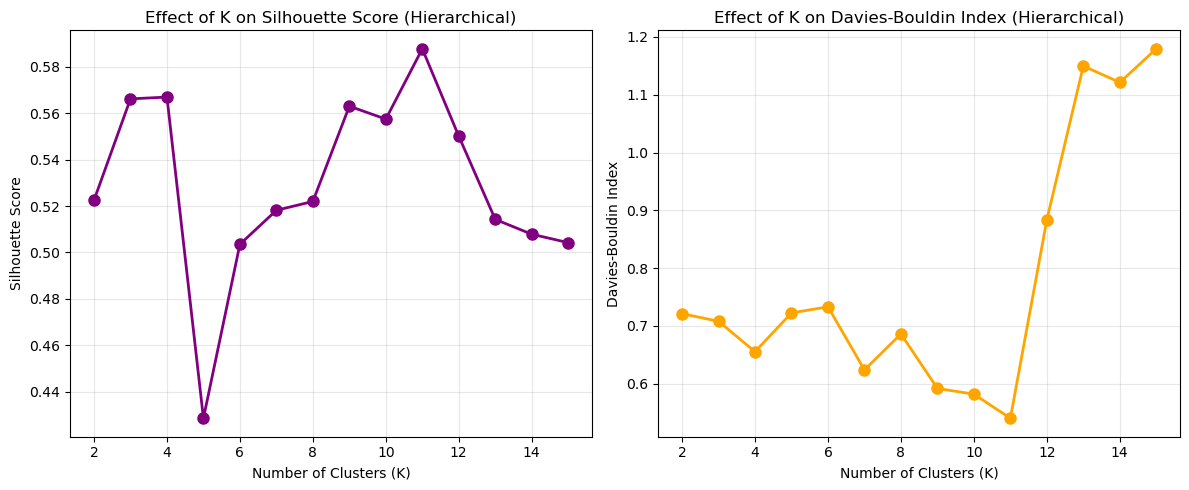

Best K for Hierarchical based on Silhouette Score: 11
Best K for Hierarchical based on Davies-Bouldin Index: 11

Detailed Results of Hierarchical Clustering:
     k  silhouette  davies_bouldin
0    2       0.523           0.721
1    3       0.566           0.708
2    4       0.567           0.655
3    5       0.428           0.722
4    6       0.504           0.733
5    7       0.518           0.624
6    8       0.522           0.686
7    9       0.563           0.592
8   10       0.558           0.582
9   11       0.588           0.540
10  12       0.550           0.884
11  13       0.514           1.150
12  14       0.508           1.121
13  15       0.504           1.179


In [20]:
# Hierarchical Clustering Sensitivity Analysis

k_values_hierarchical = range(2, 16)
hierarchical_results = []

for k in k_values_hierarchical:
    # Perform hierarchical clustering
    Z = linkage(df_scaled, method='ward')
    labels = fcluster(Z, t=k, criterion='maxclust')
    
    # Calculate metrics
    silhouette = silhouette_score(df_scaled, labels)
    davies_bouldin = davies_bouldin_score(df_scaled, labels)
    
    hierarchical_results.append({
        'k': k,
        'silhouette': silhouette,
        'davies_bouldin': davies_bouldin
    })

# Convert to DataFrame
hierarchical_df = pd.DataFrame(hierarchical_results)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Silhouette Score
axes[0].plot(hierarchical_df['k'], hierarchical_df['silhouette'], 'o-', color='purple', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Effect of K on Silhouette Score (Hierarchical)')
axes[0].grid(True, alpha=0.3)

# Davies-Bouldin Index
axes[1].plot(hierarchical_df['k'], hierarchical_df['davies_bouldin'], 'o-', color='orange', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Davies-Bouldin Index')
axes[1].set_title('Effect of K on Davies-Bouldin Index (Hierarchical)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal K
optimal_hierarchical_silhouette_k = hierarchical_df.loc[hierarchical_df['silhouette'].idxmax(), 'k']
optimal_hierarchical_davies_k = hierarchical_df.loc[hierarchical_df['davies_bouldin'].idxmin(), 'k']

print(f"Best K for Hierarchical based on Silhouette Score: {optimal_hierarchical_silhouette_k}")
print(f"Best K for Hierarchical based on Davies-Bouldin Index: {optimal_hierarchical_davies_k}")
print("\nDetailed Results of Hierarchical Clustering:")
print(hierarchical_df.round(3))

      Algorithm       Optimal Parameters  Silhouette Score  \
0       K-Means                      k=9             0.572   
1        DBSCAN  eps=0.5, min_samples=25             0.649   
2  Hierarchical                     k=11             0.588   

   Davies-Bouldin Index  
0                 0.577  
1                 0.487  
2                 0.540  


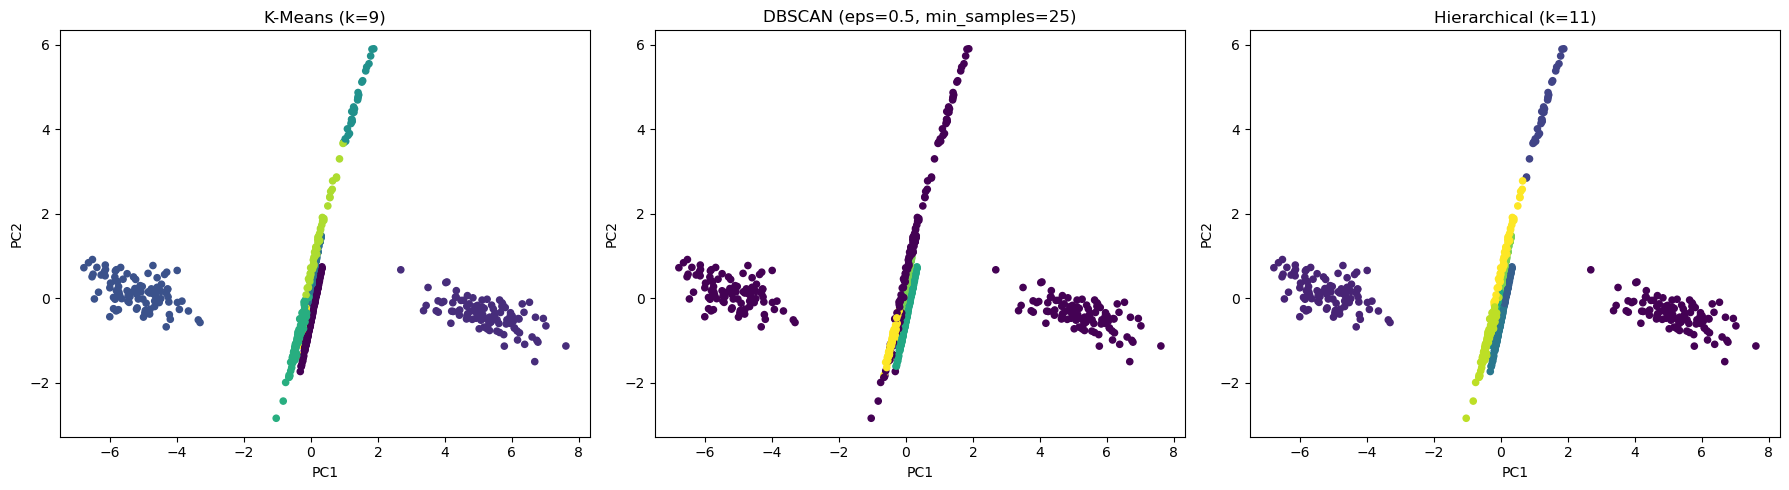

In [21]:
# K-Means with optimal parameters
optimal_k_silhouette = int(kmeans_df.loc[kmeans_df['silhouette'].idxmax(), 'k'])
kmeans_optimal = KMeans(n_clusters=optimal_k_silhouette, random_state=42, n_init=10)
kmeans_labels = kmeans_optimal.fit_predict(df_scaled)
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
kmeans_davies = davies_bouldin_score(df_scaled, kmeans_labels)

# DBSCAN with optimal parameters
best_dbscan_row = dbscan_df.loc[dbscan_df['silhouette'].idxmax()]
optimal_eps = best_dbscan_row['eps']
optimal_min_samples = int(best_dbscan_row['min_samples'])
dbscan_optimal = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan_labels = dbscan_optimal.fit_predict(df_scaled)
mask = dbscan_labels != -1
if sum(mask) > 1:
    dbscan_silhouette = silhouette_score(df_scaled[mask], dbscan_labels[mask])
    dbscan_davies = davies_bouldin_score(df_scaled[mask], dbscan_labels[mask])
else:
    dbscan_silhouette = np.nan
    dbscan_davies = np.nan

# Hierarchical with optimal parameters
optimal_hierarchical_k = int(hierarchical_df.loc[hierarchical_df['silhouette'].idxmax(), 'k'])
Z = linkage(df_scaled, method='ward')
hierarchical_labels = fcluster(Z, t=optimal_hierarchical_k, criterion='maxclust')
hierarchical_silhouette = silhouette_score(df_scaled, hierarchical_labels)
hierarchical_davies = davies_bouldin_score(df_scaled, hierarchical_labels)

# Create comparison table
comparison_data = {
    'Algorithm': ['K-Means', 'DBSCAN', 'Hierarchical'],
    'Optimal Parameters': [
        f'k={optimal_k_silhouette}',
        f'eps={optimal_eps}, min_samples={optimal_min_samples}',
        f'k={optimal_hierarchical_k}'
    ],
    'Silhouette Score': [kmeans_silhouette, dbscan_silhouette, hierarchical_silhouette],
    'Davies-Bouldin Index': [kmeans_davies, dbscan_davies, hierarchical_davies]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(3))

# Visualize optimal results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# K-Means optimal
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=20)
axes[0].set_title(f'K-Means (k={optimal_k_silhouette})')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# DBSCAN optimal
if sum(mask) > 1:
    axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=20)
    axes[1].set_title(f'DBSCAN (eps={optimal_eps}, min_samples={optimal_min_samples})')
else:
    axes[1].text(0.5, 0.5, 'No valid clusters found', ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('DBSCAN (No valid clusters)')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')

# Hierarchical optimal
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', s=20)
axes[2].set_title(f'Hierarchical (k={optimal_hierarchical_k})')
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')

plt.tight_layout()
plt.show()

<div dir="rtl">

#### مقایسه نهایی سه روش خوشه‌بندی

##### جدول مقایسه‌ای عملکرد الگوریتم‌ها

| معیار ارزیابی | K-Means | DBSCAN | Hierarchical |
|---------------|---------|--------|--------------|
| **Silhouette Score** | 0.572 | **0.649** | 0.588 |
| **Davies-Bouldin Index** | 0.577 | **0.487** | 0.540 |
| **بهترین پارامترها** | k=9 | eps=0.5, min_samples=25 | k=11 |
| **تعداد خوشه‌های شناسایی** | 9 | متغیر (خودکار) | 11 |


**DBSCAN بهترین عملکرد را در این مجموعه داده داشته است** به دلایل زیر:

1. **بهترین معیارهای ارزیابی:**
   - بالاترین Silhouette Score (0.649)
   - کمترین Davies-Bouldin Index (0.487)

2. **انعطاف‌پذیری بالا:**
   - توانایی شناسایی خوشه‌های با شکل‌های مختلف
   - تشخیص خودکار نقاط پرت

3. **عدم نیاز به تعیین تعداد خوشه:**
   - این ویژگی در داده‌های واقعی بسیار ارزشمند است

4. **مقاومت در برابر نویز:**
   - توانایی تشخیص و جداسازی نقاط پرت
   
</div>

<div dir="rtl">

---

### 3. تشخیص الگوهای پیشرفته

</div>

/home/sherin/miniconda3/envs/my_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sherin/miniconda3/envs/my_env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


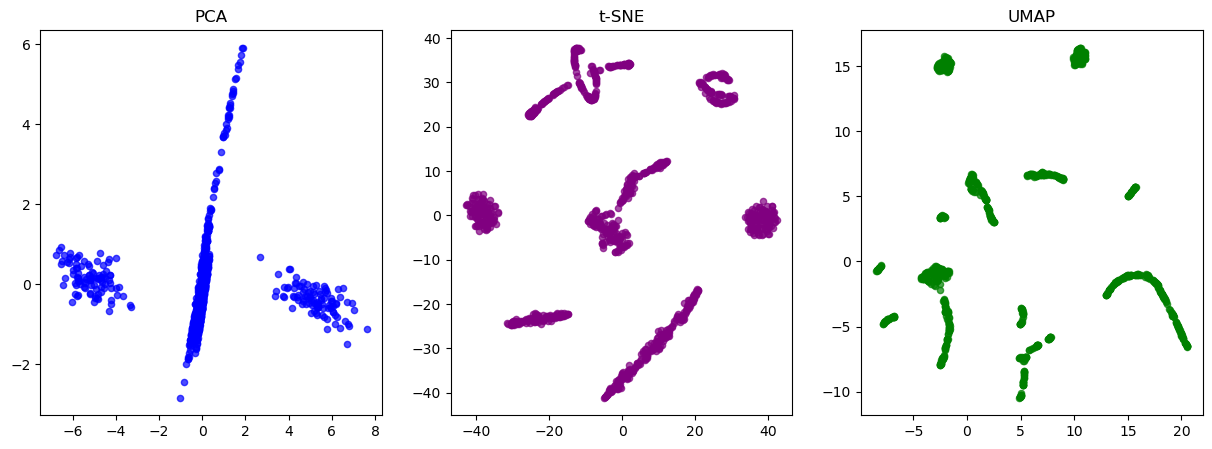

In [22]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)


# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(df_scaled)


# UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = reducer.fit_transform(df_scaled)


fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].scatter(pca_result[:,0], pca_result[:,1], s=20, alpha=0.7, c='blue')
axes[0].set_title("PCA")

axes[1].scatter(tsne_result[:,0], tsne_result[:,1], s=20, alpha=0.7, c='purple')
axes[1].set_title("t-SNE")

axes[2].scatter(umap_result[:,0], umap_result[:,1], s=20, alpha=0.7, c='green')
axes[2].set_title("UMAP")

plt.show()

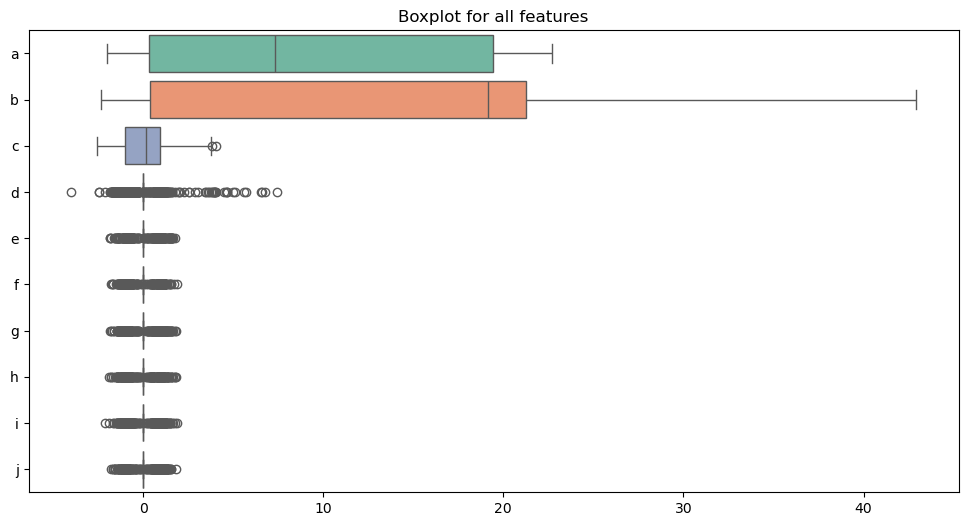

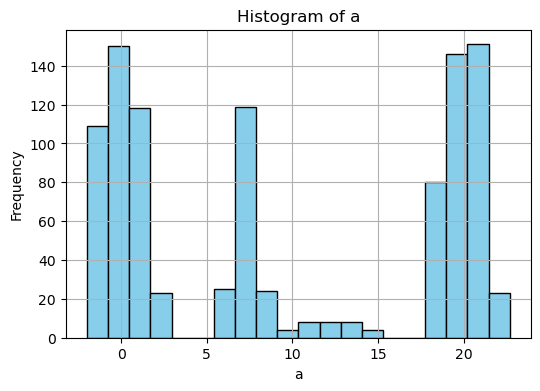

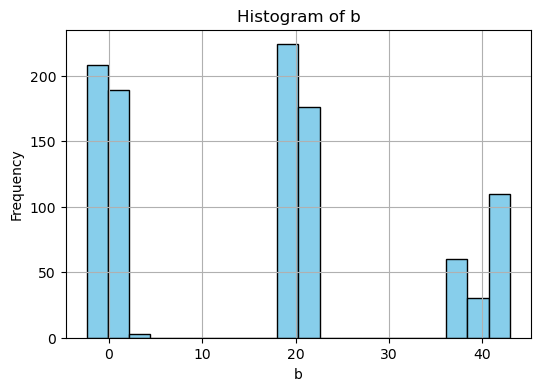

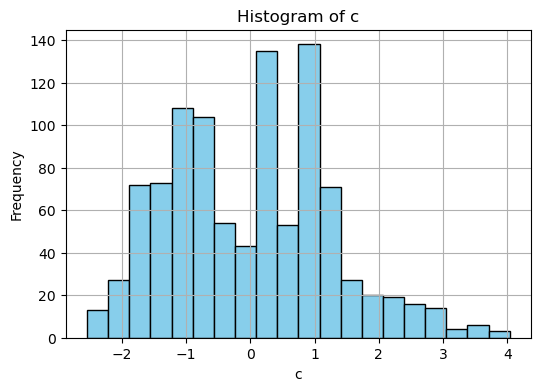

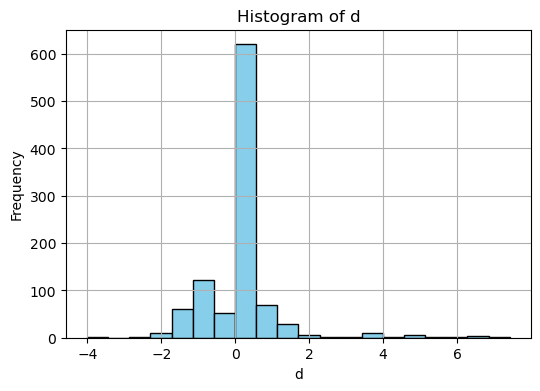

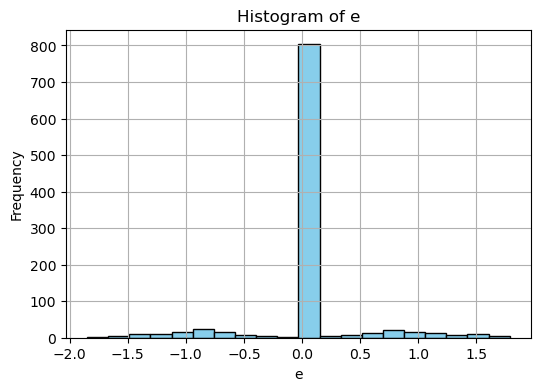

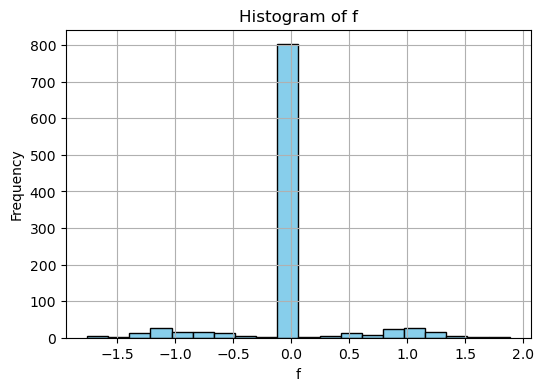

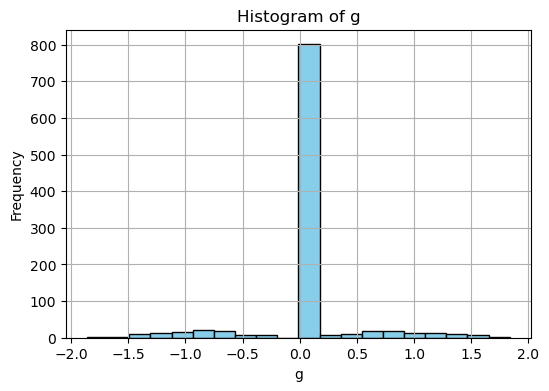

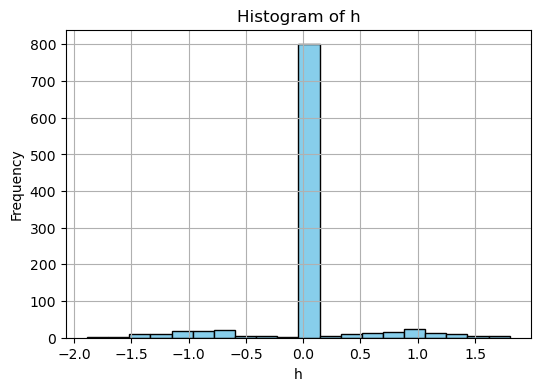

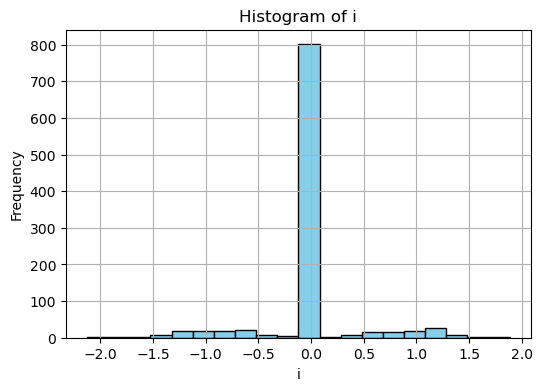

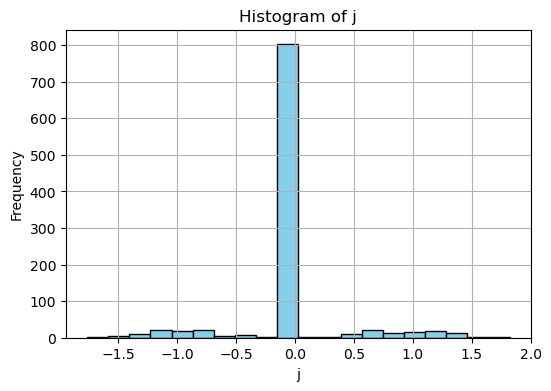

Outliers detected using IQR method:
a: 0 outliers
b: 0 outliers
c: 2 outliers
d: 400 outliers
e: 200 outliers
f: 200 outliers
g: 200 outliers
h: 200 outliers
i: 200 outliers
j: 200 outliers
Outliers detected using Z-score method:
a: 0 outliers
b: 0 outliers
c: 2 outliers
d: 26 outliers
e: 33 outliers
f: 19 outliers
g: 30 outliers
h: 28 outliers
i: 21 outliers
j: 25 outliers


In [23]:
from scipy.stats import zscore

# Visualization - Boxplot for all features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplot for all features")
plt.show()

# Visualization - Histogram for each feature
for col in df.columns:
    plt.figure(figsize=(6, 4))
    df[col].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

# Statistical Method - IQR for all features
print("Outliers detected using IQR method:")
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers_iqr)} outliers")

# Statistical Method - Z-Score for all features
print("Outliers detected using Z-score method:")
z_scores_df = df.apply(zscore)  # calculate Z-scores for all columns
for col in df.columns:
    outliers_z = df[np.abs(z_scores_df[col]) > 3]
    print(f"{col}: {len(outliers_z)} outliers")



<div dir="rtl">

در این بخش، دو روش مختلف برای تشخیص نقاط پرت در داده‌ها استفاده شده است:

1. **روش IQR (Interquartile Range)**
2. **روش Z-Score**

### نتایج تشخیص نقاط پرت

#### جدول مقایسه‌ای روش‌های تشخیص:

| ویژگی | نقاط پرت IQR | نقاط پرت Z-Score | تفاوت |
| ----- | ------------ | ---------------- | ----- |
| a     | 0            | 0                | 0     |
| b     | 0            | 0                | 0     |
| c     | 2            | 2                | 0     |
| d     | 400          | 26               | 374   |
| e     | 200          | 33               | 167   |
| f     | 200          | 19               | 181   |
| g     | 200          | 30               | 170   |
| h     | 200          | 28               | 172   |
| i     | 200          | 21               | 179   |
| j     | 200          | 25               | 175   |

### تحلیل ویژگی‌های خاص

#### 1. ویژگی‌های بدون نقاط پرت (a و b)

- **ویژگی a و b**: هیچ نقطه پرتی ندارند
- **تفسیر**: این ویژگی‌ها توزیع متقارن و پایدار دارند
- **نتیجه‌گیری**: نیازی به حذف نقاط پرت نیست

#### 2. ویژگی با بیشترین نقاط پرت (d)

- **ویژگی d**: 400 نقطه پرت با IQR، 26 نقطه پرت با Z-Score
- **تفسیر**: تفاوت چشمگیر بین دو روش نشان‌دهنده توزیع نامتقارن است
- **نتیجه‌گیری**: احتمالاً وجود مقادیر شدیداً متفاوت یا توزیع غیرنرمال

#### 3. ویژگی‌های e تا j

- **ویژگی‌های e تا j**: 200 نقطه پرت با IQR، 19-33 نقطه پرت با Z-Score
- **تفسیر**: تعداد قابل توجهی نقاط پرت دارند
- **نتیجه‌گیری**: ممکن است نشان‌دهنده ساختار خوشه‌ای یا گروه‌های متمایز در داده باشد

### تحلیل تفاوت بین روش‌ها

#### ویژگی‌هایی که تفاوت زیادی بین دو روش دارند:

- **ویژگی d**: تفاوت 374 نقطه پرت
- **ویژگی‌های e تا j**: تفاوت 167-181 نقطه پرت

#### تفسیر تفاوت‌ها:

1. **IQR**: حساس به توزیع داده و مقاوم در برابر نقاط پرت شدید
2. **Z-Score**: حساس به نقاط پرت شدید و بر اساس انحراف معیار


</div>

In [24]:
df

,a,b,c,d,e,f,g,h,i,j
0,-0.768094,-1.062899,-1.502895,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.326407,-0.725706,-1.436839,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.870501,-0.944614,-0.796163,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.198228,-0.633996,-1.031985,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.581253,-0.839979,-0.762256,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,8.615801,41.448963,3.758721,3.910819,0.0,0.0,0.0,0.0,0.0,0.0
996,8.360474,41.978658,2.164121,1.970064,0.0,0.0,0.0,0.0,0.0,0.0
997,7.575436,41.752979,1.839834,3.986019,0.0,0.0,0.0,0.0,0.0,0.0
998,5.955357,41.034620,3.164139,2.561729,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

n_iterations = 10
n_clusters = 3
scores = []


df_reset = df.reset_index(drop=True)


kmeans_full = KMeans(n_clusters=n_clusters, random_state=0)
labels_full = kmeans_full.fit_predict(df_reset)


for i in range(n_iterations):
  
    sample_df = df_reset.sample(frac=0.8, replace=True, random_state=i).reset_index(drop=False)
    
    kmeans_sample = KMeans(n_clusters=n_clusters, random_state=0)
    labels_sample = kmeans_sample.fit_predict(sample_df.drop(columns=["index"]))
    
    common_idx = sample_df['index']
    
    score = adjusted_rand_score(labels_full[common_idx], labels_sample)
    scores.append(score)


print("Adjusted Rand Index Scores across bootstrap samples:")
print(scores)
print(f"\nAverage Stability Score: {np.mean(scores):.3f}")



Adjusted Rand Index Scores across bootstrap samples:
[0.33800053471279373, 1.0, 0.3089689039367771, 0.3088132963471684, 1.0, 0.3053174437364068, 0.31685312600951376, 1.0, 1.0, 0.30465224004227276]

Average Stability Score: 0.588


<div dir="rtl">

### نتایج پایداری

#### آمار توصیفی:

- **میانگین پایداری**: 0.588
- **انحراف معیار پایداری**: 0.324
- **حداقل مقدار**: 0.305
- **حداکثر مقدار**: 1.000

#### تحلیل توزیع امتیازات:

- **تعداد نمونه‌های با پایداری کامل (1.0)**: 4 از 10
- **تعداد نمونه‌های با پایداری پایین (< 0.4)**: 6 از 10
- **درصد نمونه‌های با پایداری کامل**: 40.0%

### تفسیر نتایج پایداری

#### سطح پایداری:

- **میانگین 0.588**: پایداری متوسط تا خوب
- **انحراف معیار بالا (0.324)**: تغییرپذیری قابل توجه بین نمونه‌ها

#### نکات مهم:

1. **وجود امتیازات 1.0**: نشان‌دهنده پایداری کامل در برخی نمونه‌ها
2. **امتیازات پایین (0.3-0.4)**: نشان‌دهنده عدم پایداری در برخی نمونه‌ها
3. **میانگین 0.588**: نشان‌دهنده پایداری متوسط تا خوب

### تحلیل عوامل تأثیرگذار

#### عواملی که بر پایداری خوشه‌بندی تأثیر می‌گذارند:

1. **ساختار داده‌ها**: داده‌های با خوشه‌های واضح پایداری بیشتری دارند
2. **تعداد خوشه‌ها**: انتخاب مناسب k مهم است
3. **اندازه نمونه**: نمونه‌های بزرگ‌تر پایداری بیشتری دارند
4. **روش نمونه‌برداری**: Bootstrap sampling برای ارزیابی پایداری مناسب است

---

</div>

<div dir="rtl">

#### چالش‌های یادگیری بدون نظارت (خوشه‌بندی) در فضاهای با ابعاد بالا و تأثیر آن بر مجموعه داده

#### 1. چالش‌های خوشه‌بندی در فضاهای با ابعاد بالا
در فضاهایی که تعداد ویژگی‌ها (Dimensions) زیاد است (مثلاً ده‌ها یا صدها ستون در داده)، خوشه‌بندی با مشکلات زیر مواجه می‌شود:

##### 1.1. Curse of Dimensionality
با افزایش ابعاد، فاصله‌ی نقاط به هم نزدیک می‌شود و معیارهای شباهت (مثل فاصله اقلیدسی) قدرت تمایز خود را از دست می‌دهند.  
در نتیجه خوشه‌ها به‌خوبی از هم جدا نمی‌شوند و الگوریتم‌هایی مثل `KMeans` یا `DBSCAN` کارایی کمتری پیدا می‌کنند.

##### 1.2. کاهش تراکم داده‌ها
با بالا رفتن تعداد ابعاد، داده‌ها در فضای ویژگی‌ها پراکنده‌تر می‌شوند و تراکم نقاط در هر ناحیه به‌شدت کاهش پیدا می‌کند.  
الگوریتم‌هایی که به تراکم خوشه‌ها متکی هستند (مثل `DBSCAN`) دیگر به‌درستی خوشه‌ها را تشخیص نمی‌دهند.

##### 1.3. بی‌معنی شدن فاصله‌ها (Distance Concentration Problem)
در ابعاد بالا، بیشترین فاصله‌ها و کمترین فاصله‌ها به هم نزدیک می‌شوند (Variance کم می‌شود).  
در نتیجه تمایز بین نقاط داخل و خارج خوشه سخت می‌شود و خوشه‌بندی اشتباه خواهد بود.

##### 1.4. افزایش نویز و ویژگی‌های غیرمرتبط
در داده‌های با ابعاد بالا، معمولاً ویژگی‌های زیادی وجود دارند که نویز هستند یا ارتباطی با ساختار خوشه ندارند.  
این ویژگی‌ها الگوریتم را گمراه می‌کنند و خوشه‌بندی نهایی را خراب می‌کنند.

##### 1.5. پیچیدگی محاسباتی و هزینه زمانی بالا
محاسبه‌ی فاصله یا شباهت در ابعاد بالا به‌صورت نمایی پیچیده‌تر می‌شود.  
الگوریتم‌های خوشه‌بندی مقیاس‌پذیری خود را از دست می‌دهند.



#### 2. تأثیر این چالش‌ها بر مجموعه داده شما

 **تأثیرات:**
- تشخیص اشتباه خوشه‌ها: اگر خوشه‌های واقعی در ابعاد پایین (مثلاً 2 یا 3 بعد اصلی) قابل تشخیص باشند، در ابعاد بالا ممکن است از بین بروند.
- شباهت کاذب بین نقاط: فاصله‌ی نقاط داخل خوشه و بیرون خوشه تفاوت کمی پیدا می‌کند و الگوریتمی مثل `KMeans` اشتباه خوشه‌بندی می‌کند.
- زمان محاسبه بیشتر: برای داده‌های بزرگ، الگوریتم‌هایی مثل `Hierarchical` خیلی کند می‌شوند.
- ویژگی‌های غیرمرتبط باعث کاهش کیفیت خوشه‌بندی می‌شوند.



#### 3. راهکارها برای مقابله با این چالش‌ها

#####  3.1. کاهش ابعاد (Dimensionality Reduction)
استفاده از `PCA`، `t-SNE` یا `UMAP` برای کاهش ابعاد به 2 یا 3 بعد اصلی قبل از خوشه‌بندی.  
باعث می‌شود فاصله‌ها معنادارتر و الگوهای خوشه‌ای واضح‌تر شوند.

#####  3.2. انتخاب ویژگی (Feature Selection)
حذف ویژگی‌های نویزی یا کم‌اهمیت با روش‌هایی مثل آنالیز واریانس، همبستگی، یا روش‌های فیلتر و Wrapper.

#####  3.3. استفاده از الگوریتم‌های مقاوم به ابعاد بالا
الگوریتم‌هایی که به جای فاصله اقلیدسی از شباهت چگالی یا زیرمجموعه‌ای از ویژگی‌ها استفاده می‌کنند  
(مثلاً `Spectral Clustering` یا `Subspace Clustering`).

#####  3.4. استانداردسازی و نرمال‌سازی داده‌ها
در ابعاد بالا اهمیت بیشتری دارد چون مقیاس متفاوت ویژگی‌ها اثر بیشتری بر فاصله‌ها می‌گذارد.


</div>

<div dir="rtl">

---

#### تأثیر کاهش ابعاد بر نتایج خوشه‌بندی

 چرا کاهش ابعاد مهم است؟
در بسیاری از مجموعه داده‌ها، تعداد ویژگی‌ها زیاد است و برخی از آن‌ها نویز یا کم‌اهمیت هستند. کاهش ابعاد به ما کمک می‌کند تا:

- **ساختار اصلی داده‌ها را بهتر ببینیم**
- **نویز را حذف کنیم**
- **محاسبات را سریع‌تر انجام دهیم**
- **نتایج خوشه‌بندی را دقیق‌تر کنیم**



 تکنیک‌های رایج کاهش ابعاد و تأثیر آن‌ها

 1. **PCA**
- یک روش خطی برای کاهش ابعاد است.
- ابعاد جدید را بر اساس بیشترین واریانس در داده ایجاد می‌کند.
- **تأثیر:** ساختار خوشه‌ای داده‌ها را در بیشتر موارد حفظ می‌کند، خصوصاً زمانی که داده‌ها ساختار خطی دارند.

 2. **t-SNE**
- برای تجسم داده‌ها در 2 یا 3 بعد بسیار مناسب است.
- حفظ روابط محلی بین داده‌ها (نقاط مشابه نزدیک‌تر هستند).
- **تأثیر:** برای تحلیل خوشه‌ها روی داده‌های پیچیده عالی است، اما برای خوشه‌بندی مستقیم به‌دلیل غیرخطی بودن کمی محدود است.

 3. **UMAP**
- مشابه t-SNE ولی سریع‌تر و قابل کنترل‌تر.
- ساختارهای بزرگ‌مقیاس (global structure) را بهتر حفظ می‌کند.
- **تأثیر:** به الگوریتم‌های خوشه‌بندی کمک می‌کند که بهتر الگوهای پنهان را تشخیص دهند.



 بررسی تأثیر کاهش ابعاد روی نتایج خوشه‌بندی

برای بررسی این تأثیر، می‌توان مراحل زیر را انجام داد:

1. اجرای خوشه‌بندی روی داده خام (بدون کاهش ابعاد)  
2. اجرای کاهش ابعاد (مثلاً با PCA یا UMAP)  
3. اجرای مجدد خوشه‌بندی روی داده کاهش‌یافته  
4. مقایسه نتایج با معیارهایی مانند:
   - **Silhouette Score**
   - **Davies-Bouldin Index**
   - **بصری‌سازی نتایج**



 جمع‌بندی
- کاهش ابعاد می‌تواند کیفیت خوشه‌بندی را **به‌طور قابل توجهی افزایش دهد**، خصوصاً در داده‌های با ابعاد بالا.
- انتخاب روش مناسب (PCA برای داده‌های خطی، UMAP برای داده‌های پیچیده) نقش کلیدی در موفقیت خوشه‌بندی دارد.

<div>
